In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy.stats import loguniform
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("cleaned_logistic.csv")
df.head()

,cibil_score,loan_amount,loan_status
0,778,29900000,1
1,417,12200000,0
2,506,29700000,0
3,467,30700000,0
4,382,24200000,0


In [3]:
X = df[[' cibil_score', ' loan_amount']]
y = df[' loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [6]:
param_dist = {
    "C": loguniform(0.01, 10),  # Regularization strength (continuous range)
    "penalty": ["l1", "l2"],  # L1 (Lasso) or L2 (Ridge)
    "solver": ["liblinear"],  # Compatible solver
}

log_reg = LogisticRegression()
random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist,n_iter=20, cv=5, scoring="f1", n_jobs=-1, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]

In [7]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [9]:
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Best Hyperparameters: {'C': np.float64(0.19762189340280073), 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.95
Precision: 0.98
Recall: 0.94
F1-Score: 0.96
Confusion Matrix:
[[313  10]
 [ 32 499]]


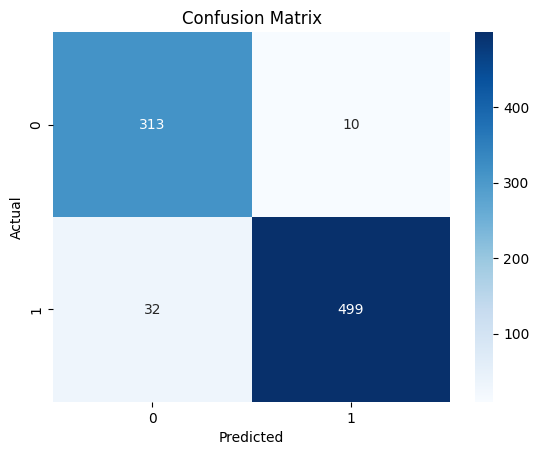

In [17]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()